In [10]:
import numpy as np 
from scipy.stats import norm
N = norm.cdf
fn=norm.pdf

import matplotlib.pyplot as plt

In [3]:
def generate_path(S,K,T,r,q,sigma,call = True):
  """
  Function that generates the price of a European option.
  S,K,T,r,q,and sigma have the usual meaning
  call should be True if that price is for a call option or False if it is 
  for a put option
  """
  Z = np.random.normal()
  fin_S = S*np.exp((r-q-(sigma**2)/2)*T + sigma*np.sqrt(T)*Z)
  call_price = np.exp(-r*T)*max(fin_S - K,0)
  put_price  = np.exp(-r*T)*max(K - fin_S,0)
  if call:
    return call_price
  else:
    return put_price 

In [16]:
np.random.seed(1929)
def finite_difference(h,n,greek = "delta",arg = [10,5,50,0.1,0.2,0.05, True], cde=False):
  """
  Function that generates finite difference estimators for the greeks of a 
  European option
  - h: is the small value added/subtracted to theta to compute the estimator
  - n: is the number of simulations of the price that are averaged
  - greek: is the greek that should be retrieved expressed as a string 
  (e.g. "delta")
  - arg is a list containing the arguments of the option (see generate_path for 
  details)
  - cde should be False if we wish to retrieve an FDE estimator and true for
   the CDE
  """
  argn = arg.copy()
  S,K,T,r,q,sigma,call=arg
  d1 = (np.log(S/K) + (r -q+  sigma**2/2)*T) / (sigma*np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)
  if greek == "delta":
    index=0
    if call==False:
      true=np.exp(-q*T)*(N(d1)-1)
    else:
      true=np.exp(-q*T)*N(d1)
  elif greek=="theta":
    index=2
    true=sigma*S*np.exp(-q*T)*fn(d1)/(2*np.sqrt(T))
    t1=q*S*np.exp(-q*T)*N(d1)
    t2=r*K*np.exp(-r*T)*N(d2)
    if call==False:
      true=true+t1-t2
    else:
      true=true-t1+t2
  elif greek == "vega":
    index=3
    true=S*np.exp(-q*T)*fn(d1)*np.sqrt(T)
  #elif greek=="epsilon":
  #  index=4
  elif greek=="rho":
    index=5
    true=T*K*np.exp(-r*T)
    if call==False:
      true=true*-1*N(-d2)
    else:
      true=true*N(d2)
      
  argn[index] = argn[index] + h 
  if cde:
    arg[index]=arg[index]-h
  res = np.zeros([n,2])
  for i in range(n):
    res[i,0] = generate_path(argn[0],argn[1],argn[2],argn[3],argn[4],argn[5],argn[6])
    res[i,1] = generate_path(arg[0],arg[1],arg[2],arg[3],arg[4],arg[5],arg[6])
  fd=(np.mean(res[:,0])-np.mean(res[:,1]))/h
  return fd, true, fd-true

finite_difference(0.1, 100000, "theta", [10,5,5,0.1,0.2,0.05, False],cde=True)

(0.03299052981900559, 0.42277053462076847, -0.3897800048017629)

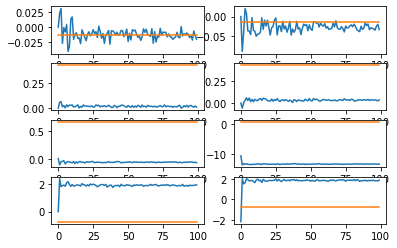

In [50]:
res=np.zeros((100,3))
greeks=["delta", "theta", "vega", "rho"]
figure, axis = plt.subplots(4, 2)
for i in range(len(greeks)):
    for c in range(2):
        res=np.zeros((100,3))
        for n in range(1,10000, 100):
            if c==1:
                ch=True
            else:
                ch=False
            res[int(np.floor(n/100)),:]=finite_difference(0.1, n, greeks[i], [10,5,5,0.1,0.2,0.05, False],cde=ch)
            #issue vega without CDE, with cde seems fine (true value changes between the two?)
            #theta
        axis[i,c].plot(res[:,[0, 1]])

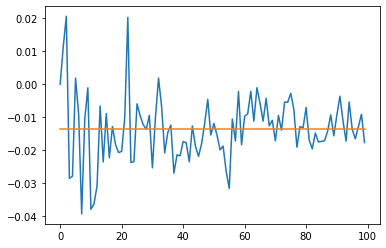

In [48]:
plt.plot(res[:,[0, 1]])